In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from tqdm import tqdm
import seaborn as sns
from data_clean.newClean import get_data, get_corr_from_year
from sklearn.cluster import AffinityPropagation

In [5]:
#get data
df_years, min_year, max_year = get_data()
corrlist = [get_corr_from_year(year, df_years, min_year) for year in range(min_year+1, max_year+1)]

/Users/bruger/opt/anaconda3/lib/python3.9/site-packages/pandas/core/internals/blocks.py:402: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)
/Users/bruger/opt/anaconda3/lib/python3.9/site-packages/pandas/core/internals/blocks.py:402: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


In [7]:
for i in enumerate(corrlist):
    print('year: ', i[0]+min_year+1)
    print('nodes: ', i[1].shape[0])
    print('edges: ', np.sum(np.where(i[1] != 0, 1, 0))//2-i[1].shape[0])
    print()

year:  2006
nodes:  1868
edges:  1742844

year:  2007
nodes:  1954
edges:  1907104

year:  2008
nodes:  2057
edges:  2113567

year:  2009
nodes:  2161
edges:  2332799

year:  2010
nodes:  2244
edges:  2515524

year:  2011
nodes:  2422
edges:  2930620

year:  2012
nodes:  2511
edges:  3150049

year:  2013
nodes:  2670
edges:  3561780

year:  2014
nodes:  2832
edges:  4007280

year:  2015
nodes:  3006
edges:  4515012

year:  2016
nodes:  3007
edges:  4518017

year:  2017
nodes:  3004
edges:  4509004

year:  2018
nodes:  3012
edges:  4533060

year:  2019
nodes:  3000
edges:  4497000

year:  2020
nodes:  2993
edges:  4476031

year:  2021
nodes:  2996
edges:  4485012



In [8]:
# combine all correlation matrix into one array
allcorr = np.array([])
for corr in corrlist:
    corr = np.triu(corr, k=1)
    corr = corr[corr != 0]
    allcorr = np.append(allcorr, corr)

Text(0, 0.5, 'Frequency')

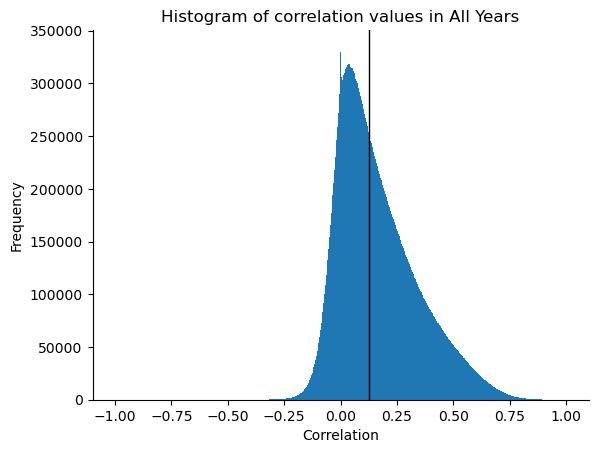

In [9]:
#hist on allcorr
plt.hist(allcorr, bins=1000)
#without borders
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.axvline(np.percentile(allcorr, 50), color='black', linewidth=1)

# plt.yscale('log')
plt.title(f'Histogram of correlation values in All Years')
plt.xlabel('Correlation')
plt.ylabel('Frequency')

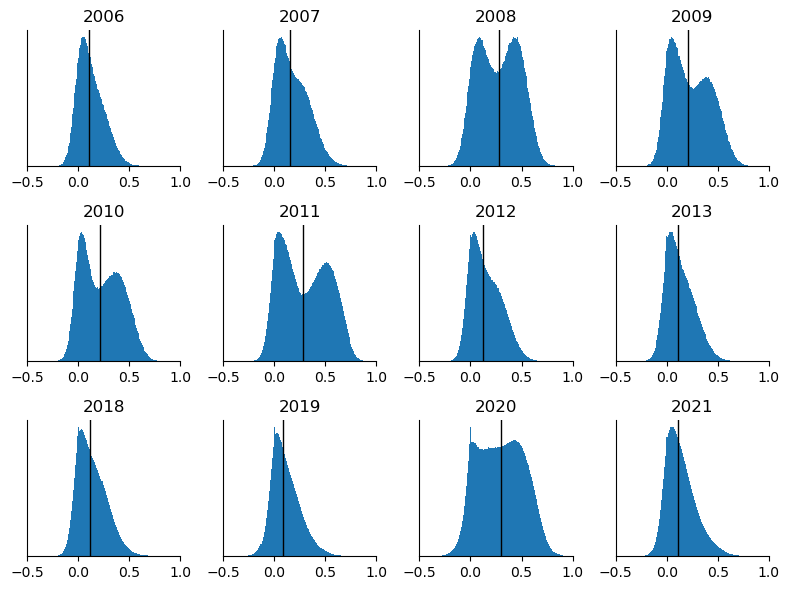

In [10]:
#histogram of correlation values in each year but not (8,9,10,11)
excorrlist = [corrlist[i] for i in range(len(corrlist)) if i not in (8,9,10,11)]
ncols, nrows, scale = 4,3,2
plt.figure(figsize = (ncols*scale, nrows*scale))
for i in range(nrows*ncols):
    try:
        plt.subplot(nrows, ncols, i+1)
        histcorr = excorrlist[i]
        histcorr = np.triu(histcorr, k=1)
        histcorr = histcorr[histcorr != 0]
        #set line at 75 percentile and color the histogram after that line 
        plt.hist(histcorr, bins=200)
        plt.axvline(np.percentile(histcorr, 50), color='black', linewidth=1)
        #without borders
        plt.gca().spines['top'].set_visible(False)
        plt.gca().spines['right'].set_visible(False)
        plt.xlim(left=-0.5, right=1)
        plt.yticks([])
        if i < 8:
            plt.title(f'{min_year+1+i}')
        else:
            plt.title(f'{min_year+1+i+4}')
    except:
        pass
plt.tight_layout()
plt.show()